# Introduction
The Dataset which we wil be using is from 'Olist Store' from Brazil. It contains 100k information between 2016-2018.
All the analysis will be made on Orders, Geolocation, Payments, Sellers and Products Datasets. 

The Aim of this project is to find Top 10 products and Seller, Analysis of orders based on geolocation and obtain information about brazilis online e-commerce profile.

In [1]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# 1. Geographical Exploratory Data Analysis

In [2]:
geo_df = pd.read_csv("C://Users//het14//A. GFG DataScience//Data//Brazilian E-commerce//olist_geolocation_dataset.csv")
geo_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [3]:
geo_df.columns

Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')

In [4]:
#importing Basemap
from mpl_toolkits.basemap import Basemap

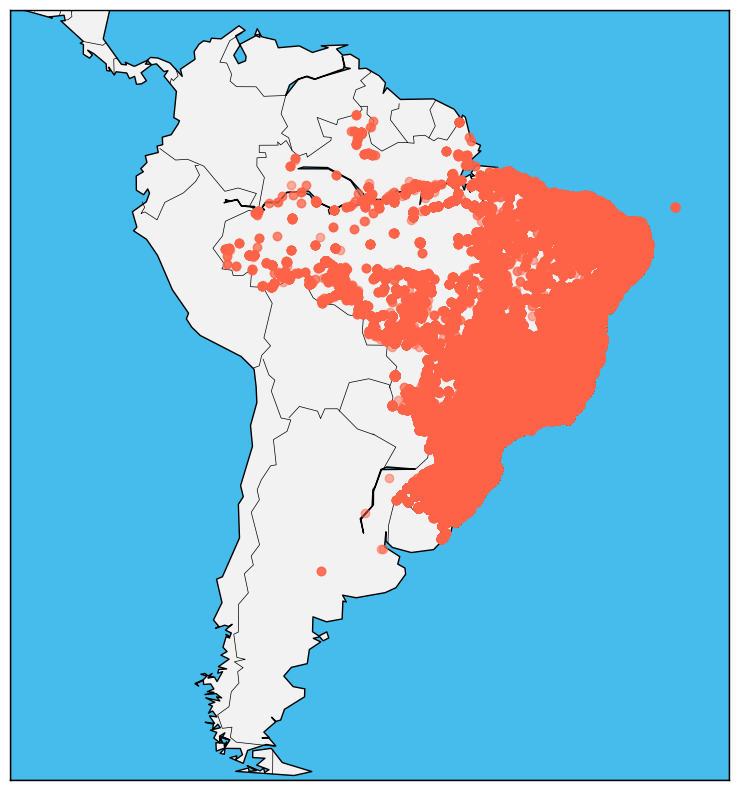

In [5]:
#plotting the lon & lat on 2D Map usign Basemap
plt.figure(figsize =  (10,10))

map = Basemap(llcrnrlat=-55.401805,llcrnrlon=-92.269176,urcrnrlat=13.884615,urcrnrlon=-27.581676)
map.bluemarble()
map.drawmapboundary(fill_color = '#46bcec')
map.fillcontinents(color='#f2f2f2', lake_color='#46bcec')
map.drawcountries()
map.drawcoastlines()
map.scatter(geo_df['geolocation_lng'], geo_df['geolocation_lat'], zorder = 10, alpha = 0.5, color = 'tomato')

Above map shows the location of purchased product orders and according to the distribution of populations, it explains the highest shopping rate on the east coast.

In [6]:
geo_df.columns

Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')

<Axes: xlabel='geolocation_state', ylabel='count'>

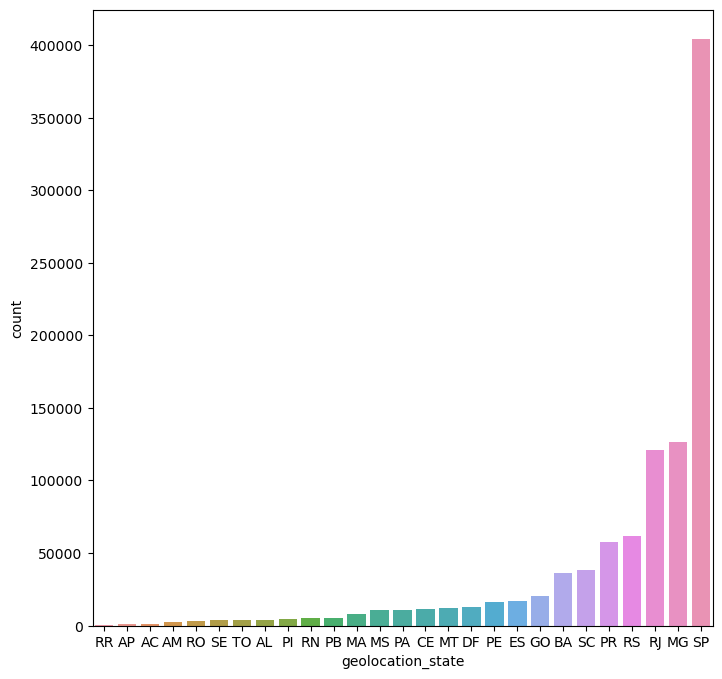

In [7]:
#state wise distribution of purchased product orders
plt.figure(figsize = (8,8))
sns.countplot(x = 'geolocation_state', data = geo_df, order=geo_df['geolocation_state'].value_counts().sort_values().index)

The above graph shows the number of product orders purchased based on the states. According to that, São Paulo has the highest rate and there is a huge gap between the rest of the states.

# 2. General Data Exploratory

In [8]:
order_df = pd.read_csv("C://Users//het14//A. GFG DataScience//Data//Brazilian E-commerce//olist_orders_dataset.csv")
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
order_df.shape

(99441, 8)

In [10]:
order_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [11]:
order_df.duplicated().sum()

0

In [12]:
order_df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

Since there are null values in the order's Dataset will fill the dates with forward-filling method. This method propogates the previous values forward.

In [13]:
order_df['order_delivered_customer_date'] = order_df['order_delivered_customer_date'].fillna(method = 'ffill')
order_df['order_delivered_customer_date'].isna().sum()

C:\Users\het14\AppData\Local\Temp\ipykernel_9540\2432498181.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  order_df['order_delivered_customer_date'] = order_df['order_delivered_customer_date'].fillna(method = 'ffill')


0

In [14]:
#Creating Customer Delivered time and Estimated delivery date features
order_df['delivered_time'] = pd.to_datetime(order_df['order_delivered_customer_date'], format = '%Y-%m-%d %H:%M:%S')
order_df['estimated_time'] = pd.to_datetime(order_df['order_estimated_delivery_date'], format = '%Y-%m-%d %H:%M:%S')

In [15]:
#Creating weekly Feature using 'order_delivered_customer_date'
order_df['weekly'] = pd.to_datetime(order_df['order_delivered_customer_date'], format = '%Y-%m-%d %H:%M:%S').dt.isocalendar().week

In [16]:
#creating Yearly feature based on 'order delivered customer date'
order_df['yearly']=pd.to_datetime(order_df['order_delivered_customer_date'])\
                    .dt.to_period('M')
order_df['yearly']= order_df['yearly'].astype(str)

In [17]:
order_df.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp                 object
order_approved_at                        object
order_delivered_carrier_date             object
order_delivered_customer_date            object
order_estimated_delivery_date            object
delivered_time                   datetime64[ns]
estimated_time                   datetime64[ns]
weekly                                   UInt32
yearly                                   object
dtype: object

In [18]:
#Difference between Estimated delivery date and Delivered Date
order_df['diff_days']= order_df['delivered_time']-order_df['estimated_time']
order_df['diff_days']= order_df['diff_days'].dt.days

C:\Users\het14\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\het14\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


I'll Look into it later


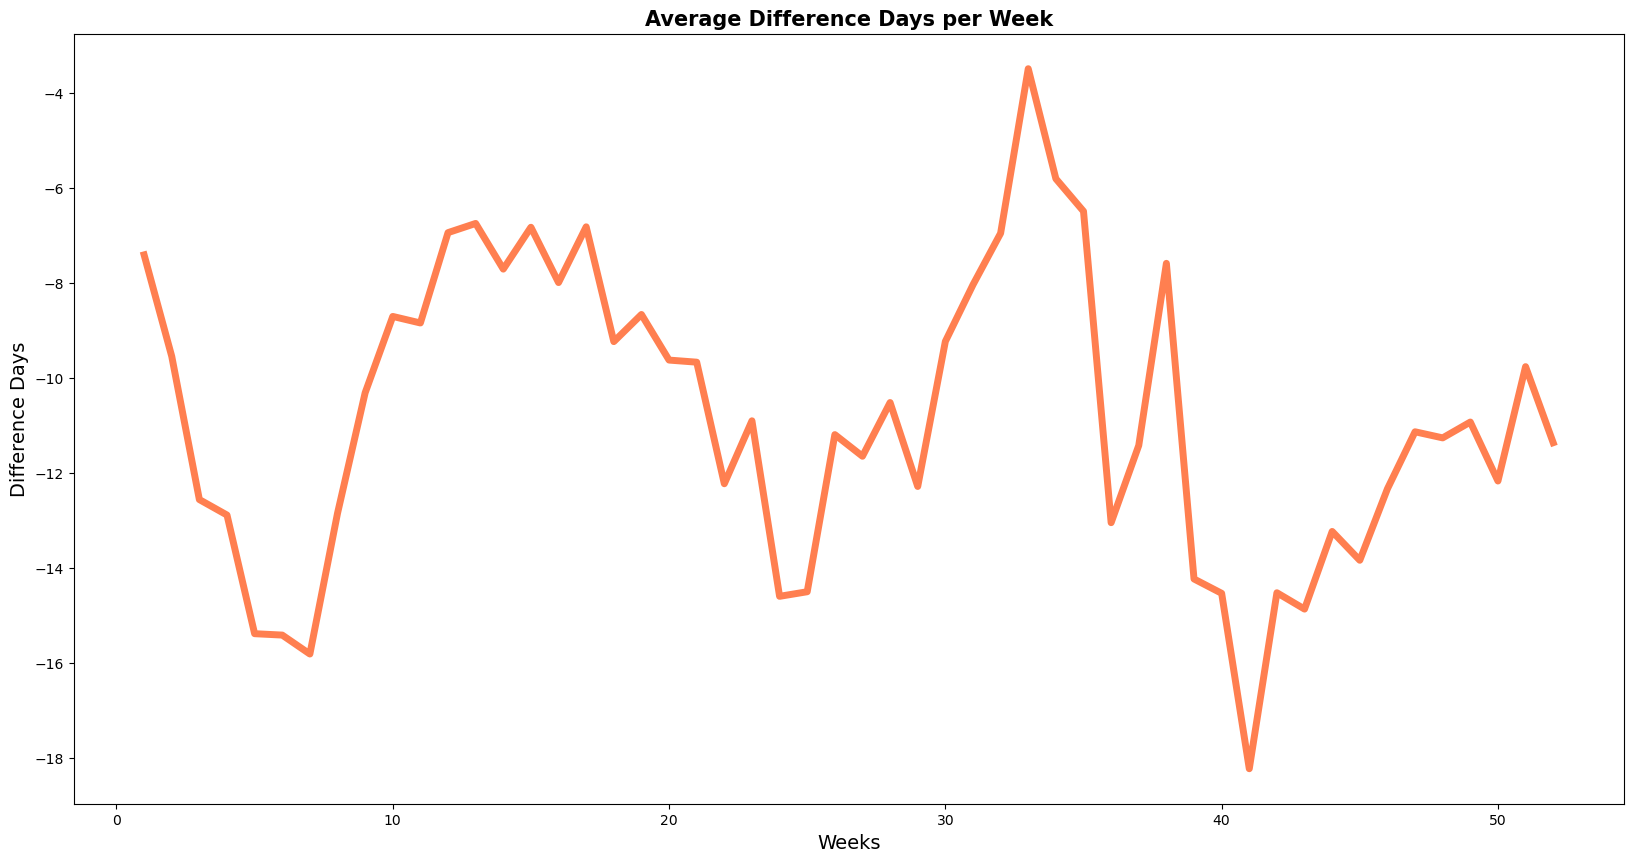

In [19]:
try:
    
    plt.figure(figsize=(20,10))
    plt.xlabel("Weeks", size=14)
    plt.ylabel("Difference Days", size=14)
    plt.title("Average Difference Days per Week",size=15, weight='bold')
    sns.lineplot(x='weekly', y='diff_days', data=order_df, linewidth=5,
                markers=True,dashes=False, color="coral", estimator='mean')

    
except TypeError:
    print("I'll Look into it later")

Above graph shows that the earliest and latest deliveries. According to that, we can say that all deliveries made before their estimated date.

-The earliest deliveries have been made in October. It means that this month is the least intensive period in those years.

-Latest deliveries have been made at the end of June and beginning of August. It means that this time is the most intensive period in those years.

# 3. Top 10 Products 

To find top 10 products we will use two datasets i.e, olist_order_items, olist_order and olist_products

In [20]:
order_items_df = pd.read_csv("C://Users//het14//A. GFG DataScience//Data//Brazilian E-commerce//olist_order_items_dataset.csv")
products_df = pd.read_csv("C://Users//het14//A. GFG DataScience//Data//Brazilian E-commerce//olist_products_dataset.csv")

In [21]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [22]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [23]:
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_time,estimated_time,weekly,yearly,diff_days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-10 21:25:13,2017-10-18,41,2017-10,-8
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-08-07 15:27:45,2018-08-13,32,2018-08,-6
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08-17 18:06:29,2018-09-04,33,2018-08,-18
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017-12-02 00:28:42,2017-12-15,48,2017-12,-13
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018-02-16 18:17:02,2018-02-26,7,2018-02,-10


In [24]:
#merge Data first will combine order_df with order_items_df
total_order = pd.merge(order_df, order_items_df)
product_order = pd.merge(total_order, products_df, on = 'product_id')
product_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   customer_id                    112650 non-null  object        
 2   order_status                   112650 non-null  object        
 3   order_purchase_timestamp       112650 non-null  object        
 4   order_approved_at              112635 non-null  object        
 5   order_delivered_carrier_date   111456 non-null  object        
 6   order_delivered_customer_date  112650 non-null  object        
 7   order_estimated_delivery_date  112650 non-null  object        
 8   delivered_time                 112650 non-null  datetime64[ns]
 9   estimated_time                 112650 non-null  datetime64[ns]
 10  weekly                         112650 non-null  UInt32        
 11  

Since the product_id value name is long, it needed to be shortened to make an analysis. With taking the last eight characters, uniqueness preserved.

In [25]:
product_order['product_id'].nunique()

32951

In [26]:
product_order['product_id_shorten']=product_order['product_id'].str[-8:]

In [27]:
len(product_order['product_id'].unique())

32951

Plotting Top 10 Products

Text(0.5, 1.0, 'Top 10 Products')

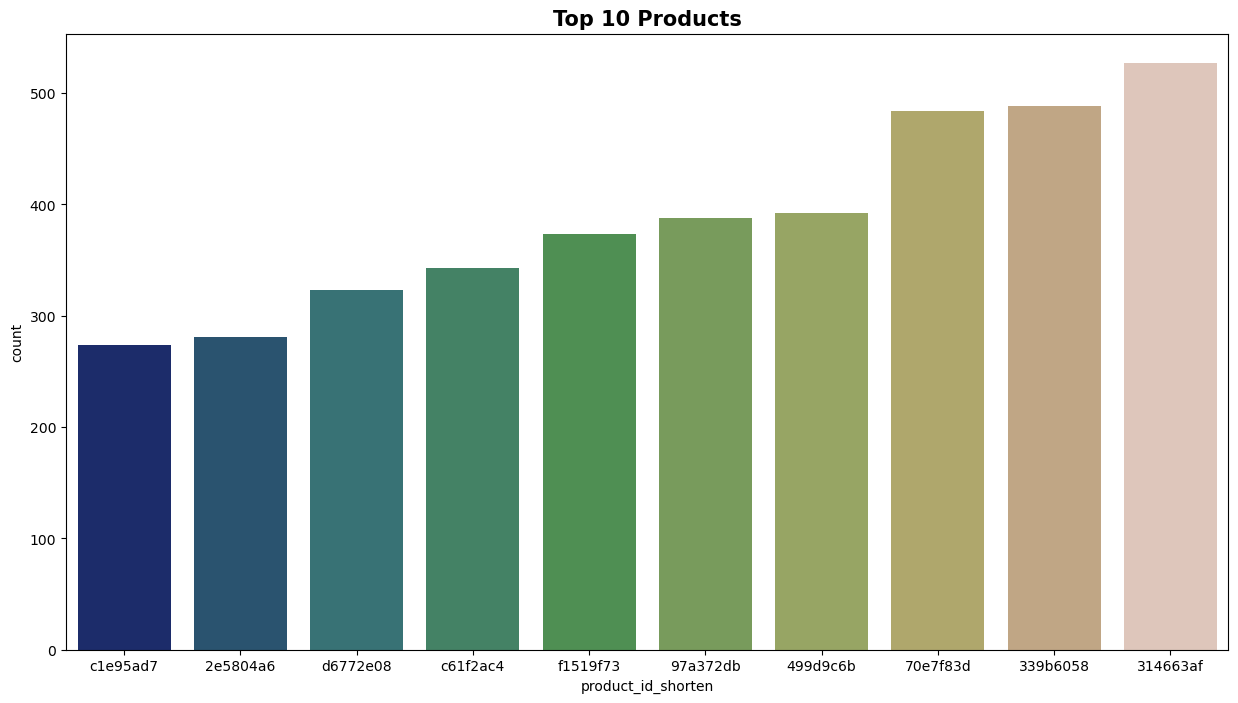

In [28]:
plt.figure(figsize = (15,8))
sns.countplot(x='product_id_shorten', data = product_order,palette='gist_earth', order=product_order['product_id_shorten'].value_counts()[:10]\
             .sort_values().index).set_title("Top 10 Products", fontsize=15,
                                             weight='bold')

The above graph shows the Top 10 products. Top 3 products have a significant difference from the others. Because of the data information, we can't say about what are these products. But we can assume about their category.

First Top 10 products' category shown below the table. According to the table, bed_table_bath orders have the highest one.

In [29]:
product_order.groupby(["product_category_name"])["product_id_shorten"].count().sort_values(ascending=False).head(10)

product_category_name
cama_mesa_banho           11115
beleza_saude               9670
esporte_lazer              8641
moveis_decoracao           8334
informatica_acessorios     7827
utilidades_domesticas      6964
relogios_presentes         5991
telefonia                  4545
ferramentas_jardim         4347
automotivo                 4235
Name: product_id_shorten, dtype: int64

In [30]:
group_category = product_order.groupby(['product_id_shorten', 'product_category_name'])['product_id_shorten'].count().sort_values(ascending = False).head(10)
group_category

product_id_shorten  product_category_name 
314663af            moveis_decoracao          527
339b6058            cama_mesa_banho           488
70e7f83d            ferramentas_jardim        484
499d9c6b            ferramentas_jardim        392
97a372db            ferramentas_jardim        388
f1519f73            ferramentas_jardim        373
c61f2ac4            informatica_acessorios    343
d6772e08            relogios_presentes        323
2e5804a6            beleza_saude              281
c1e95ad7            informatica_acessorios    274
Name: product_id_shorten, dtype: int64

Despite the top product category of bed_table_bath, the top ordered product's category is a home decoration

# 4. Top 10 Sellers 

In [31]:
sellers_df = pd.read_csv("C://Users//het14//A. GFG DataScience//Data//Brazilian E-commerce//olist_sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


First seller dataset will be merged with the product orders data.

In [36]:
seller_product_order = pd.merge(product_order, sellers_df, on = 'seller_id' )
seller_product_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   customer_id                    112650 non-null  object        
 2   order_status                   112650 non-null  object        
 3   order_purchase_timestamp       112650 non-null  object        
 4   order_approved_at              112635 non-null  object        
 5   order_delivered_carrier_date   111456 non-null  object        
 6   order_delivered_customer_date  112650 non-null  object        
 7   order_estimated_delivery_date  112650 non-null  object        
 8   delivered_time                 112650 non-null  datetime64[ns]
 9   estimated_time                 112650 non-null  datetime64[ns]
 10  weekly                         112650 non-null  UInt32        
 11  

the seller id name needed to be shortened. Same as Product_id

In [37]:
len(seller_product_order['seller_id'].unique())

3095

In [43]:
seller_product_order['seller_id_shorten']=seller_product_order['seller_id'].str[-6:]

In [44]:
seller_product_order['seller_id'].nunique()

3095

Below pie chart shows the Top 10 Seller. First 3 sellers have close proportions.

Text(0.5, 1.0, 'Top 10 Seller')

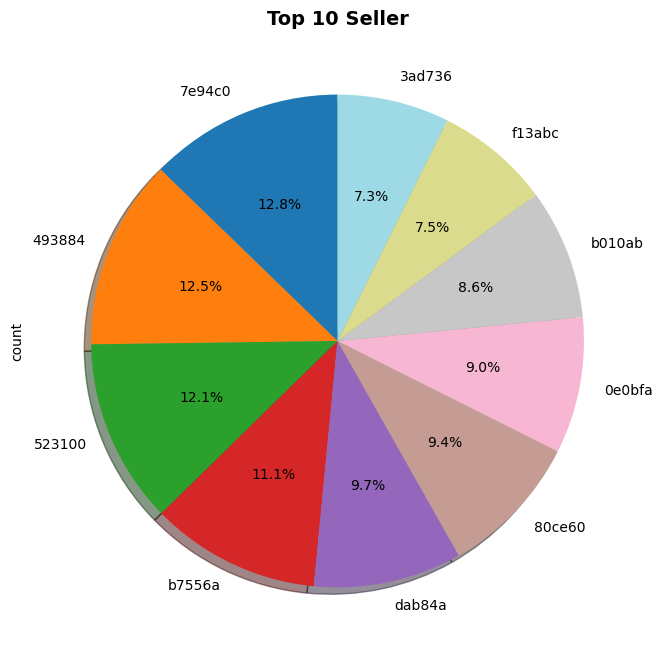

In [46]:
plt.figure(figsize = (8,8))
seller_product_order['seller_id_shorten'].value_counts()[:10].plot.pie(shadow = True, autopct='%1.1f%%', startangle=90, cmap='tab20')
plt.title("Top 10 Seller", size = 14, weight = 'bold')

In [49]:
seller_category= seller_product_order.groupby(['seller_id_shorten', 'product_category_name'])\
                        ['seller_id_shorten'].count().sort_values(ascending=False).head(10)
seller_category

seller_id_shorten  product_category_name
523100             ferramentas_jardim       1882
7e94c0             relogios_presentes       1628
493884             cama_mesa_banho          1572
0e0bfa             moveis_decoracao         1292
dab84a             cama_mesa_banho          1277
b010ab             moveis_escritorio        1233
f13abc             telefonia                1178
b7556a             beleza_saude             1091
3ad736             cool_stuff               1069
3b52b2             relogios_presentes       1002
Name: seller_id_shorten, dtype: int64

# 5. Payments Analysis

In [50]:
payment_df = pd.read_csv('C://Users//het14//A. GFG DataScience//Data//Brazilian E-commerce//olist_order_payments_dataset.csv')
payment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [52]:
merged_df = pd.merge(seller_product_order, payment_df, on = 'order_id')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117601 entries, 0 to 117600
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       117601 non-null  object        
 1   customer_id                    117601 non-null  object        
 2   order_status                   117601 non-null  object        
 3   order_purchase_timestamp       117601 non-null  object        
 4   order_approved_at              117586 non-null  object        
 5   order_delivered_carrier_date   116356 non-null  object        
 6   order_delivered_customer_date  117601 non-null  object        
 7   order_estimated_delivery_date  117601 non-null  object        
 8   delivered_time                 117601 non-null  datetime64[ns]
 9   estimated_time                 117601 non-null  datetime64[ns]
 10  weekly                         117601 non-null  UInt32        
 11  

In [53]:
payments= merged_df.drop(columns=['product_name_lenght','product_description_lenght',
                                 'product_photos_qty','product_weight_g','product_length_cm',
                                 'product_height_cm','product_width_cm'])

In [54]:
price_details= payments.groupby(['order_id','price','product_category_name',
                                 'yearly','weekly'])[['freight_value','payment_value']].sum().reset_index()

In [55]:
price_details['total_order_value'] = price_details['price'] + price_details['freight_value']

In [57]:
#We can calculate Gross Profit and Profit Margin by payment value and total order value
price_details['gross_profit'] = price_details['payment_value']- price_details['total_order_value']
price_details['profit_margin'] = price_details['gross_profit']/price_details['payment_value']
price_details['profit_margin'] = price_details['profit_margin'].astype('int64')

In [58]:
price_details.sort_values('gross_profit', ascending=False).head(10)

,order_id,price,product_category_name,yearly,weekly,freight_value,payment_value,total_order_value,gross_profit,profit_margin
1466,03caa2c082116e1d31e67e9ae3700499,1680.00,telefonia_fixa,2017-10,42,224.08,109312.64,1904.08,107408.56,0
66523,ab14fdcfbe524636d65ee38360e22ce8,98.70,automotivo,2017-09,35,288.80,45256.00,387.50,44868.50,0
10548,1b15974a0141d54e36626dca3fdc731a,100.00,informatica_acessorios,2018-03,10,202.40,44048.00,302.40,43745.60,0
17262,2cc9089445046817a7539d90805e6e5a,989.10,agro_industria_e_comercio,2017-12,50,146.94,36489.24,1136.04,35353.20,0
90941,e8fa22c3673b1dd17ea315021b1f0f61,284.99,bebidas,2018-05,18,168.70,30186.00,453.69,29732.31,0
44991,736e1922ae60d0d6a89247b851902527,1790.00,telefonia_fixa,2018-07,30,114.88,29099.52,1904.88,27194.64,0
25844,428a2f660dc84138d969ccd69a0ab6d5,65.49,moveis_decoracao,2017-12,50,243.30,18384.75,308.79,18075.96,0
22593,3a213fcdfe7d98be74ea0dc05a8b31ae,108.00,relogios_presentes,2018-01,4,186.24,17786.88,294.24,17492.64,0
96747,f80549a97eb203e1566e026ab66f045b,137.90,informatica_acessorios,2017-09,39,388.10,17671.00,526.00,17145.00,0
26447,4412d97cb2093633afa85f11db46316c,120.00,informatica_acessorios,2018-06,23,83.99,15978.65,203.99,15774.66,0


C:\Users\het14\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\het14\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\het14\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\het14\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

Text(0.5, 1.0, 'Gross Profit of Top 5 Products (2016-2018)')

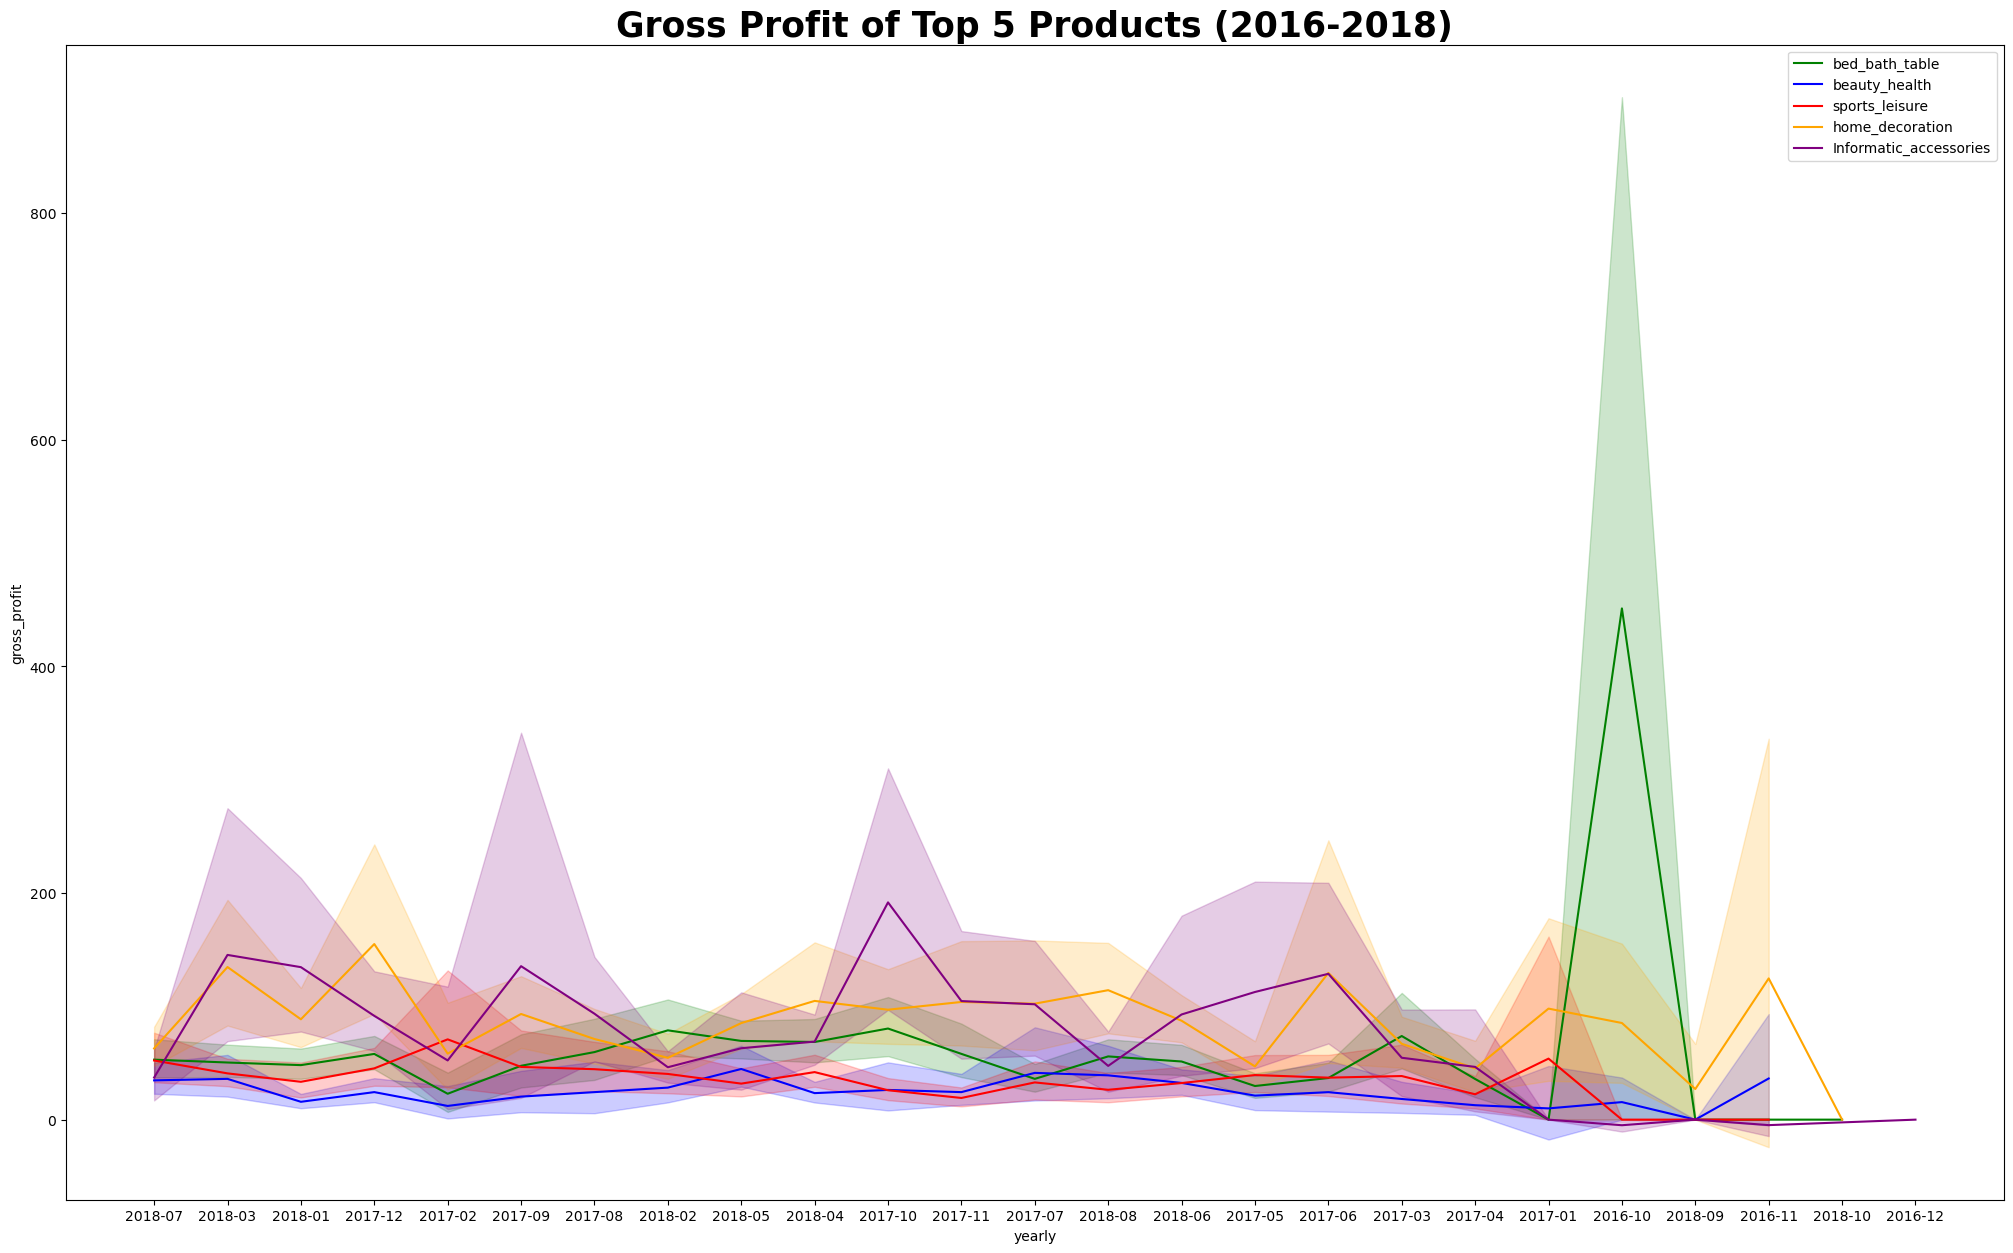

In [61]:
plt.figure(figsize=(25,15))

sns.lineplot(x='yearly',y='gross_profit',
             data=price_details[price_details['product_category_name']\
             =='cama_mesa_banho'], label='bed_bath_table',color="green")
sns.lineplot(x='yearly', y='gross_profit',
             data=price_details[price_details['product_category_name']\
             =='beleza_saude'], label='beauty_health', color="blue")
sns.lineplot(x='yearly', y='gross_profit',
             data=price_details[price_details['product_category_name']\
             =='esporte_lazer'], label='sports_leisure', color="red")
sns.lineplot(x='yearly', y='gross_profit',
             data=price_details[price_details['product_category_name']\
             =='moveis_decoracao'], label='home_decoration', color="orange")
sns.lineplot(x='yearly', y='gross_profit',
             data=price_details[price_details['product_category_name']\
             =='informatica_acessorios'], label='Informatic_accessories', color="purple")
plt.title("Gross Profit of Top 5 Products (2016-2018)",fontweight='bold', size = 25)

Above graph shows yearly 'gross profit' distribution for the top 5 product category of ordered products and sellers. According to data, we can say that informatic_accessories have the highest gross profit in Agust 2017 to November 2017. On the other hand, the top 3 products which are bed_bath_table, beauty_health and sports_leisure, gross profits are less than 200 units of currency.